In [3]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, wasserstein_distance
from utils import load_pretrained_model, total_variation_distance

In [2]:
from torchvision.models import resnet50

In [4]:
model_weights = load_pretrained_model(resnet50)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


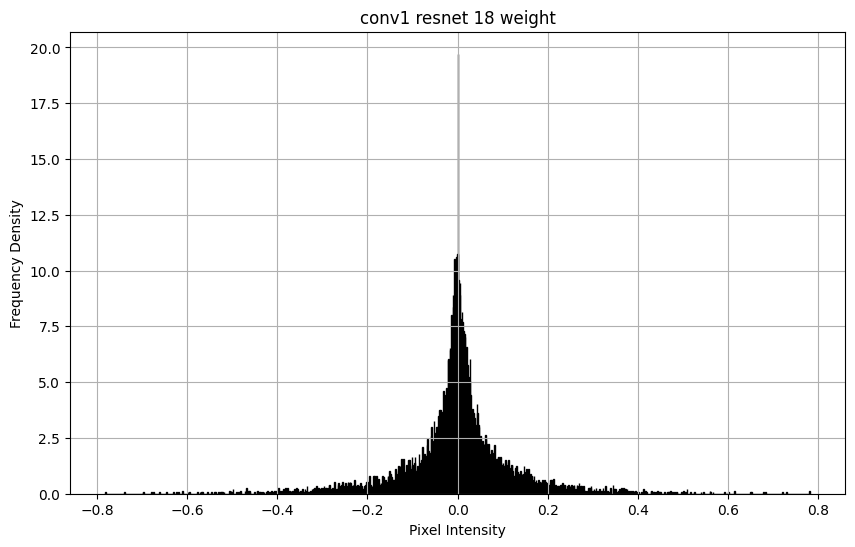

In [ ]:
plot_histogram(np.array(model_weights['conv1.weight']).flatten(), 'conv1 resnet 18 weight',num_bins=1000, normalize=True)

In [5]:
all_weight = np.array([])
for w in model_weights.values():
    all_weight = np.concatenate((all_weight, np.array(w).flatten()))

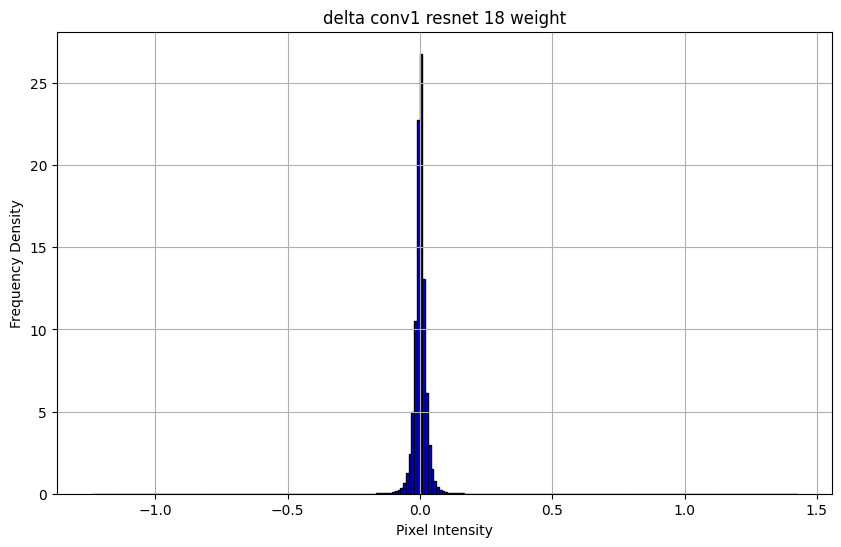

(0.0, 0.0)


In [8]:
d_weight, w_sparsity = delta_sparcity(all_weight)
plot_histogram(d_weight, 'delta conv1 resnet 18 weight', normalize=True)
print(w_sparsity)

In [6]:
def first_digit_nz(num):
    num_str = str(abs(num))
    num_str = num_str.lstrip('0')
    num_str = num_str.lstrip('.')
    if not num_str:
        return 0
    return int(num_str[0])

In [7]:
def digit_prob(arr):
    weights = np.abs(arr)  # Benford's applies to positive numbers
    digits = [first_digit_nz(x) for x in weights]
    digit_counts = [digits.count(i) for i in range(1, 10)]
    total_counts = sum(digit_counts)
    actual_probs = [d/total_counts for d in digit_counts]
    return actual_probs

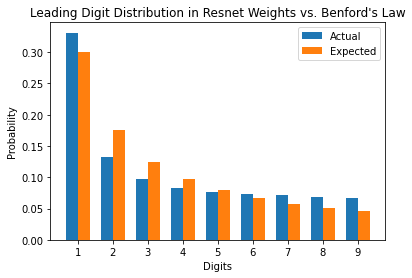

Chi-squared Statistic: 0.041219275823220575
P-value: 0.9999999926054433


In [8]:
actual_probs = digit_prob(all_weight)
benford_probs = [np.log10(1 + 1/(d)) for d in range(1, 10)]
chi_square_stat, p_value = chisquare(actual_probs, f_exp=benford_probs)

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(1, 10)
bar1 = ax.bar(index, actual_probs, bar_width, label='Actual')
bar2 = ax.bar(index + bar_width, benford_probs, bar_width, label='Expected')

ax.set_xlabel('Digits')
ax.set_ylabel('Probability')
ax.set_title('Leading Digit Distribution in Resnet Weights vs. Benford\'s Law')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([str(i) for i in range(1, 10)])
ax.legend()

plt.show()

print("Chi-squared Statistic:", chi_square_stat)
print("P-value:", p_value)
